Applications section on paper.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### FDC 1

In [122]:
units = 10000

U = np.random.binomial(1, .5, size=units) #Unobserved confounder

p_d = (.5 + U) / 2.
D = np.random.binomial(1, p_d, size=units)

p_n = (.5 + D) / 2.
N = np.random.binomial(1, p_n)

p_m = (.5 + D) / 4.
M = np.random.binomial(1, p_m)

p_y = (.5 + N + M + U) / 4.
Y = np.random.binomial(1, p_y)

df = pd.DataFrame({'D': D, 'N': N, 'M': M, 'Y': Y})

In [123]:
df.corr()

,D,N,M,Y
D,1.000000,0.487995,0.295542,0.300854
N,0.487995,1.000000,0.147252,0.347414
M,0.295542,0.147252,1.000000,0.297359
Y,0.300854,0.347414,0.297359,1.000000


Check support

N
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

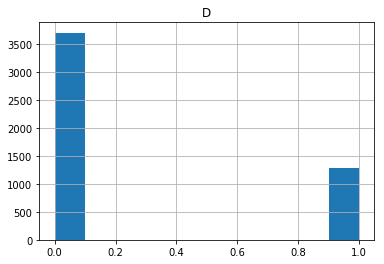

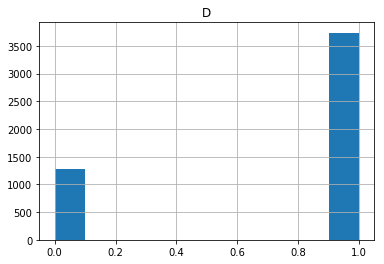

In [124]:
df.groupby('N').hist('D')

N
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

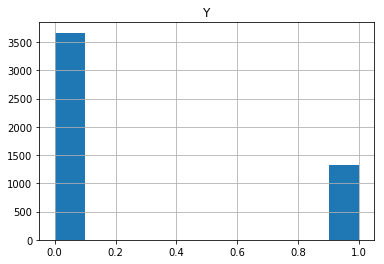

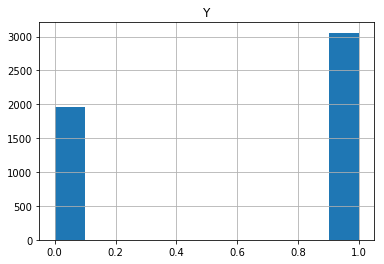

In [125]:
df.groupby('N').hist('Y')

M
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

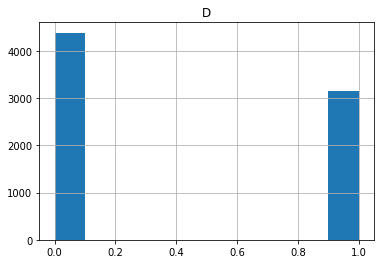

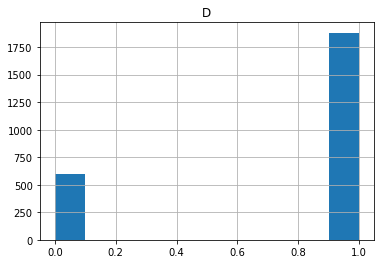

In [126]:
df.groupby('M').hist('D')

M
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

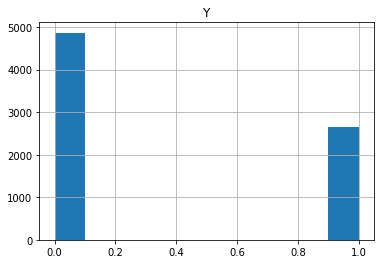

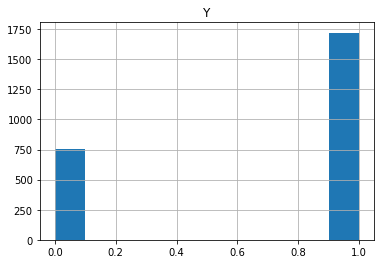

In [127]:
df.groupby('M').hist('Y')

In [128]:
pd_estn = (df[df['N'] == 1].D.sum() + df[df['N'] == 0].D.sum()) / df.shape[0]
pd_estm = (df[df['M'] == 1].D.sum() + df[df['M'] == 0].D.sum()) / df.shape[0]
pd_est = df['D'].mean()

Calculate joint probabilities

In [129]:
pd1n1 = df[df['D'] == 1][df['N'] == 1].shape[0] / df.shape[0]
pd1n0 = df[df['D'] == 1][df['N'] == 0].shape[0] / df.shape[0]
pd0n1 = df[df['D'] == 0][df['N'] == 1].shape[0] / df.shape[0]
pd0n0 = df[df['D'] == 0][df['N'] == 0].shape[0] / df.shape[0]

pd1m1 = df[df['D'] == 1][df['M'] == 1].shape[0] / df.shape[0]
pd1m0 = df[df['D'] == 1][df['M'] == 0].shape[0] / df.shape[0]
pd0m1 = df[df['D'] == 0][df['M'] == 1].shape[0] / df.shape[0]
pd0m0 = df[df['D'] == 0][df['M'] == 0].shape[0] / df.shape[0]

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.p

Calculate conditionals of the form $P(N|D)$ and $P(M|D)$

In [137]:
pn1_d1 = pd1n1 / pd_estn
pn0_d1 = pd1n0 / pd_estn

pm1_d1 = pd1m1 / pd_estm
pm0_d1 = pd1m0 / pd_estm

Calculate expectation of y given do($D$).

In [138]:
p_y_dod_n1 = df[df['D'] == 1][df['N'] == 1].Y.mean() * pd_estn + df[df['D'] == 0][df['N'] == 1].Y.mean() * (1 - pd_estn)
p_y_dod_n0 = df[df['D'] == 1][df['N'] == 0].Y.mean() * pd_estn + df[df['D'] == 0][df['N'] == 0].Y.mean() * (1 - pd_estn)

p_y_dod_m1 = df[df['D'] == 1][df['M'] == 1].Y.mean() * pd_estm + df[df['D'] == 0][df['M'] == 1].Y.mean() * (1 - pd_estm)
p_y_dod_m0 = df[df['D'] == 1][df['M'] == 0].Y.mean() * pd_estm + df[df['D'] == 0][df['M'] == 0].Y.mean() * (1 - pd_estm)

/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/eric/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series ke

Estimated effect along $N$

In [139]:
deltaN = pn1_d1 * p_y_dod_n1 + pn0_d1 * p_y_dod_n0
deltaN

0.49922006439540545

Estimated effect along $M$

In [140]:
deltaM = pm1_d1 * p_y_dod_m1 + pm0_d1 * p_y_dod_m0
deltaM

0.466422199957779

Cumulative effect along $N$ and $M$

In [143]:
delta = pd_estn * deltaN + pd_estm * deltaM
delta

0.4848489809317339

### IV 1

In [46]:
units = 10000
alpha = 50
delta = 10

V = np.random.binomial(1, .5, size=units) #Unobserved confounder

p_z = (.5 + V) / 2.
Z = np.random.binomial(1, p_z, size=units) #IV

p_d = (.75 + V) / 2
D = np.random.binomial(1, p_d) #Treatment

e = np.random.normal(5, size=units) #Individual effects

Y = alpha + delta * D + e #Outcome

df = pd.DataFrame({'V': V, 'Z': Z, 'D': D, 'e': e, 'Y': Y})

Check the strength of the IV $Z$.

In [47]:
df[['Z', 'D']].corr()

,Z,D
Z,1.000000,0.260282
D,0.260282,1.000000


Check that there is correlation between $Z$ and $Y$.

In [48]:
df[['Z', 'Y']].corr()

,Z,Y
Z,1.000000,0.253255
Y,0.253255,1.000000


In [50]:
delta_est = (df[df['Z'] == 1].Y.mean() - df[df['Z'] == 0].Y.mean()) / (df[df['Z'] == 1].D.mean() - df[df['Z'] == 0].D.mean())
delta_est

9.939292035146583

`delta_est` from the WALD estimator is approximately equal to $\delta = 10$.

### Time Series 1

In [15]:
units = 10000
years = 40 #Range of years
t_pr = int(float(years) / 2.) #Time of discontinuity
delta = 20 #Effect size of being >= t_pr

X = np.random.uniform(0, years, size=units) #Years of seniority for each unit

Y_0 = np.random.normal(years - X) #Negative relationship between X and Y_0

# All workers with < 20 yrs experience are fired
D = np.array([1 if X[i] >= t_pr else 0 for i in range(units)])

Y_1 = Y_0 + delta * D #The treatment outcome for the treatment group offset by delta

Y = Y_1 * (D == 1) + Y_0 * (1 - (D == 1)) #Observed data

df = pd.DataFrame({'X': X, 'D': D, 'Y': Y})

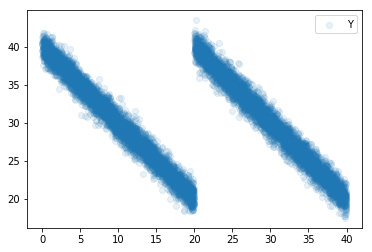

In [16]:
plt.scatter(X, Y, data=df, alpha=.1)
plt.legend('Y')

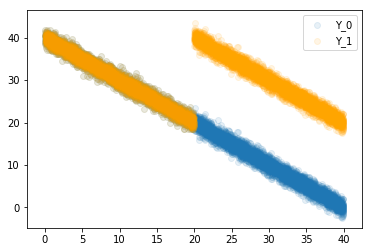

In [17]:
plt.scatter(X, Y_0, data=df, alpha=.1)
plt.scatter(X, Y_1, data=df, alpha=.1, c='orange')
plt.legend(['Y_0', 'Y_1'])

In [18]:
df['intercept'] = 1
pre_disc = df[df['X'] < t_pr]
model = sm.OLS(pre_disc['Y'], pre_disc[['X', 'intercept']])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.684e+05
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:08:47   Log-Likelihood:                -7042.1
No. Observations:                5015   AIC:                         1.409e+04
Df Residuals:                    5013   BIC:                         1.410e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.9986      0.002   -410.395      0.000      -1.003      -0.994
intercept     39.9617      0.028   1429.489      0.000      39.907      40.016
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.626
Skew:                          -0.019   Prob(JB):                        0.731
Kurtosis:                       3.039   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['y_est'] = results.predict(df[['X', 'intercept']])

In [23]:
df['y_delta'] = df['Y'] - df['y_est']
df[df['X'] > t_pr].y_delta.mean()

19.99050842195216

We recovered $\delta = 20$.

### Final Choice Selection 4

In [114]:
units = 1000
alpha = 20
delta = 10

Z = np.random.randint(0, 5, size=units)

p_d = .25 + Z / 10.
D = np.random.binomial(1, p_d)

Y = alpha + delta * D + np.random.normal()

df = pd.DataFrame({'Z': Z, 'D': D, 'Y': Y})

In our case exact matching is hopeless because of "the curse of dimensionality". In expectation for each combination of $D$ and $Z$ we should get 100 data points, so in reality would not be unexpected to get a combination of observed features with less than 10 observations of some $D$ value. In this case an exact matching for that group may discard more data points than we would like (inefficient) or it may not be accurate at all.  
We can get around this with propensity score matching because we are garnering information from all observations for each score, although they are weighted according to similarity.

Check support

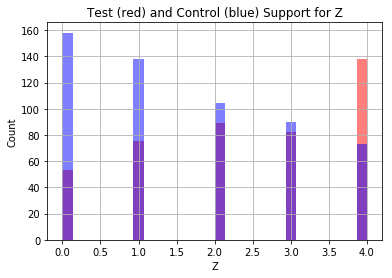

In [115]:
from causality.estimation.parametric import PropensityScoreMatching

matcher = PropensityScoreMatching()
matcher.check_support(df, 'D', {'Z': 'd'})

Support looks OK to measure the ATE, instead of an LATE.

In [116]:
matcher.estimate_ATE(df, 'D', 'Y', {'Z': 'd'})

Optimization terminated successfully.
         Current function value: 0.647149
         Iterations 5


/home/eric/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


10.0

The estimated ATE is equal to $\delta = 10$.

Without `causality`

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
propensity_model = LogisticRegression(C=1e12)
propensity_model = propensity_model.fit(df[['Z']], df['D'])
df['$P(D=1|Z)$'] = propensity_model.predict_proba(df[['Z']])[:, 1]

Compute weights for the ATE

In [119]:
df['w'] = (df['D'] == 1) * (1 / df['$P(D=1|Z)$']) + (df['D'] == 0) * (1 / (1 - df['$P(D=1|Z)$']))

In [120]:
df['intercept'] = 1
model = sm.WLS(df['Y'], df[['D', 'intercept']], weights=df['w'])
result = model.fit(cov_type='HC3')
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.062e+31
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:09:43   Log-Likelihood:                 30197.
No. Observations:                1000   AIC:                        -6.039e+04
Df Residuals:                     998   BIC:                        -6.038e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
D             10.0000   1.19e-15    8.4e+15      0.000      10.000      10.000
intercept     19.0143   9.29e-16   2.05e+16      0.000      19.014      19.014
==============================================================================
Omnibus:                       20.005   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.525
Skew:                           0.309   Prob(JB):                     5.76e-05
Kurtosis:                       2.706   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

We recover $\delta = 10$.